# 1. Web Crawling

### Requests

In [2]:
import numpy as np
import pandas as pd
import requests # urllib 말고 requests 써주세요 (urllib은 구식입니다!)

In [3]:
# requests.post에 url을 전달해주면, 해당 url의 html을 가져와줍니다.
url = "https://ghsnu.com/"

gh = requests.post(url)

status = gh.status_code

print("http status code : %s" % status) #200 : 정상, # 400  : Bad Request , # 500 Internal Server Error

http status code : 200


### BeautifulSoup

In [4]:
from bs4 import BeautifulSoup as bs
import lxml

In [5]:
# bs 로 html parsing 하기 !
html =  """<html> <head> </head> <body> <p>hello gh</p> </body></html>"""

# html parser 보다 lxml이 더 빠릅니다.
soup = bs(html, "lxml")

# 원하는 부분 선택해서 출력 !

print(soup.p)

print(soup.text)

<p>hello gh</p>
    hello gh 


#### (1) GH 홈페이지 정보 crawling

In [6]:
# requests로 html 가져오고, bs로 parsing 하기!
url = "https://ghmkt.kr/index#ABOUT-US"

gh_info = requests.post(url)

#parsing 하기 전에는 어떻게 생겼을까?
from pprint import pprint
pprint(gh_info.content)

(b'<!DOCTYPE html>\n<html lang="en" id="no-fouc">\n<head>\n<title>Growth Hacke'
 b'rs in SNU</title>\n<!-- ig-cl-new3 : live-creatorlink -->\n\n<link rel="dns'
 b'-prefetch" href="//ghmkt.kr">\n<link rel="dns-prefetch" href="//storage.g'
 b'oogleapis.com">\n<link rel="dns-prefetch" href="//fonts.googleapis.com">\n'
 b'<link rel="dns-prefetch" href="//connect.facebook.net">\n<link rel="dns-p'
 b'refetch" href="//ajax.googleapis.com">\n<link rel="dns-prefetch" href="//'
 b'www.google-analytics.com">\n<link rel="dns-prefetch" href="//pagead2.goog'
 b'lesyndication.com">\n<link rel="dns-prefetch" href="//googleads.g.doublec'
 b'lick.net">\n\t<meta name="google-signin-scope" content="profile email">\n\t<'
 b'meta id="google-meta" name="google-signin-client_id" content="">\n<!-- us'
 b"er meta tag start -->\n<META name='author' content='Growth Hackers'/><MET"
 b"A name='title' content='Growth Hackers in SNU'/><META name='description' con"
 b"tent='\xec\x84\x9c\xec\x9a\xb8\xeb\x8c\x80\xed\x95

 b'elector="p.text" data-edit="true"><br><br><br><br><span class="fsize16">'
 b'\xec\xa0\x80\xeb\x8a\x94 \xed\x98\x84\xec\x9e\xac <strong>\xeb\xb9'
 b'\x85\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0 \xec\x82\xac\xec\x97'
 b'\x85\xeb\xb6\x80\xec\x97\x90\xec\x84\x9c SNS \xed\x81\xac\xeb\xa1'
 b'\xa4\xeb\xa7\x81\xec\x9d\x84 \xeb\x8b\xb4</strong><strong>\xeb\x8b\xb9</str'
 b'ong>\xed\x95\x98\xea\xb3\xa0 \xec\x9e\x88\xec\x8a\xb5\xeb\x8b\x88'
 b'\xeb\x8b\xa4. \xec\x9d\xb4\xeb\x9e\x9c\xeb\x93\x9c\xeb\x8a\x94 \xed\x8c'
 b'\xa8\xec\x85\x98, \xec\x99\xb8\xec\x8b\x9d, \xed\x98\xb8\xed\x85\x94'
 b', \xeb\x86\x80\xec\x9d\xb4\xea\xb3\xb5\xec\x9b\x90 \xeb\x93\xb1\xec\x9d'
 b'\x98 \xec\x82\xac\xec\x97\x85\xec\x9d\x84 \xec\xa7\x84\xed\x96\x89\xed\x95'
 b'\x98\xeb\x8a\x94 \xeb\xa7\x8c\xed\x81\xbc SNS\xeb\xa5\xbc \xed'
 b'\x86\xb5\xed\x95\xb4 \xeb\xb3\xb4\xec\x97\xac\xec\xa7\x80\xeb\x8a\x94 \xea'
 b'\xb3\xa0\xea\xb0\x9d\xeb\x93\xa4\xec\x9d\x98 \xec\x9d\xbc\xec'
 b'\x83\x81\xec\x97\x90 \xea\xb4\x80\xec\x8b\xac\x

 b';\\/h1&gt;\\n    &lt;hr data-selector=&quot;hr&quot; data-border=&quot;tru'
 b'e&quot; data-title=&quot;\\uc120 \\uc0c9\\uc0c1&quot;&gt;\\n   &lt;\\/div'
 b'&gt;\\n\\n  &lt;\\/div&gt;\\n &lt;\\/div&gt;\\n&lt;\\/div&gt;","elcss":".us'
 b'erEL1862203 {\\n    padding: 40px 0 20px;\\n}\\n.userEL1862203 h1 {\\n font-'
 b"family: 'Playfair Display', 'Nanum Gothic';\\n font-size: 50px;\\n letter-"
 b'spacing: 0.025em;\\n margin-top: 0;\\n margin-bottom: 0;\\n}\\n.userEL186220'
 b'3 hr {\\n width: 64px;\\n border-top: 3px solid #2c2c2c;\\n margin: 45px au'
 b'to 0;\\n}\\n\\n@media only screen and (max-width:991px) {\\n .userEL1862203 '
 b'hr { margin-top: 36px; }\\n}\\n@media only screen and (max-width:767px) {\\'
 b'n .userEL1862203 hr { margin-top: 22.5px; }\\n}","eljs":"","elnew":"","el'
 b'settings":"{}","fonts":{"Playfair Display":"@font-face {font-family:\'Pla'
 b"yfair Display';font-style: normal;font-weight: 400;src: local('Playfair Disp"
 b"lay Regular'), local('PlayfairDisplay-Reg

 b' &gt; .cont-wrap &gt; ul &gt; li:not(.hidden):not(:empty) + li.hidden + li:n'
 b'ot(.hidden):not(:empty):before,\\n    .userEL4173296 .table &gt; .item &g'
 b't; .cont-wrap &gt; ul &gt; li:not(.hidden):not(:empty) + li.hidden + li.hidd'
 b'en + li:not(.hidden):not(:empty):before,\\n    .userEL4173296 .table &gt;'
 b' .item &gt; .cont-wrap &gt; ul &gt; li:not(.hidden):not(:empty) + li:empty:n'
 b'ot(.hidden)  + li.hidden + li:not(.hidden):not(:empty):before,\\n    .use'
 b'rEL4173296 .table &gt; .item &gt; .cont-wrap &gt; ul &gt; li:not(.hidden):no'
 b't(:empty) + li.hidden + li.hidden + li.hidden + li:not(.hidden):not(:empty):'
 b'before { margin: 0 8px; }\\n    .userEL4173296 .table &gt; .item &gt; .co'
 b'nt-wrap .tpl-forum-list-content { -webkit-line-clamp: 3;  }\\n    .userEL'
 b'4173296 .table &gt; .item &gt; .cont-wrap .tpl-forum-list-title { font-size:'
 b' 22px; }\\n    .userEL4173296 .table &gt; .item &gt; .cont-wrap .tpl-foru'
 b'm-list-cont { -webkit-line-clamp: 6; margin

 b'ue&quot; data-selector=&quot;h1&quot; class=&quot;&quot; &gt;&lt;span class='
 b'&quot;fsize30&quot; &gt;&lt;span style=&quot;color: rgb(40, 50, 78);&quot;&g'
 b't;&lt;strong&gt;&lt;em&gt;Members&lt;\\/em&gt;&lt;\\/strong&gt;&lt;\\/span&'
 b'gt;&lt;\\/span&gt;&lt;\\/h1&gt;\\n    &lt;hr data-selector=&quot;hr&quot; d'
 b'ata-border=&quot;true&quot; data-title=&quot;\\uc120 \\uc0c9\\uc0c1&quot;&g'
 b't;\\n   &lt;\\/div&gt;\\n\\n  &lt;\\/div&gt;\\n &lt;\\/div&gt;\\n&lt;\\/d'
 b'iv&gt;","elcss":".userEL1862203 {\\n    padding: 40px 0 20px;\\n}\\n.userEL'
 b"1862203 h1 {\\n font-family: 'Playfair Display', 'Nanum Gothic';\\n font-s"
 b'ize: 50px;\\n letter-spacing: 0.025em;\\n margin-top: 0;\\n margin-bottom: '
 b'0;\\n}\\n.userEL1862203 hr {\\n width: 64px;\\n border-top: 3px solid #2c2c2'
 b'c;\\n margin: 45px auto 0;\\n}\\n\\n@media only screen and (max-width:991px)'
 b' {\\n .userEL1862203 hr { margin-top: 36px; }\\n}\\n@media only screen and '
 b'(max-width:767px) {\\n .userEL186220

In [7]:
#그렇다면 parsing을 한 후에는?
soup = bs(gh_info.content, 'lxml')
print(soup)

<!DOCTYPE html>
<html id="no-fouc" lang="en">
<head>
<title>Growth Hackers in SNU</title>
<!-- ig-cl-new3 : live-creatorlink -->
<link href="//ghmkt.kr" rel="dns-prefetch"/>
<link href="//storage.googleapis.com" rel="dns-prefetch"/>
<link href="//fonts.googleapis.com" rel="dns-prefetch"/>
<link href="//connect.facebook.net" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"/>
<link href="//pagead2.googlesyndication.com" rel="dns-prefetch"/>
<link href="//googleads.g.doubleclick.net" rel="dns-prefetch"/>
<meta content="profile email" name="google-signin-scope"/>
<meta content="" id="google-meta" name="google-signin-client_id"/>
<!-- user meta tag start -->
<meta content="Growth Hackers" name="author"/><meta content="Growth Hackers in SNU" name="title"/><meta content="서울대학교 데이터 분석 학회 Growth Hackers 입니다. 데이터 기반 의사결정을 통해 비즈니스 가치 창출을 추구합니다. " name="description"/><meta content="그로스해킹, 그로스해커, 데이터 분석, 데이터 분석 동

In [8]:
about_us = soup.find("p", {"class":"text-box"})

print(about_us)

<p class="text-box" data-edit="true" data-selector="p.text-box"><span style="font-family: 'Jeju Myeongjo';"><span style="color: rgb(0, 0, 0);"><strong>Growth Hackers</strong>는 데이터 기반 의사결정을 통해 비즈니스 가치 창출을 도모하는 학회입니다.<br/>우리는 통계분석과 예측모형으로 데이터를 가공하고, 인사이트를 추출하여<br/>비즈니스 목표 달성을 위한 마케팅 및 전략적 방향성을 제시하는 것을 목표로 합니다.<br/>본 학회는 서울대학교 계량마케팅 연구소 송인성 교수님의 지도 아래<br/>서울대학교 경영대학 학생들을 중심으로 2017년 여름학기에 설립되어 다양한 학교의 학생들이 함께 하고 있습니다.</span></span></p>


In [9]:
print(about_us.text) #태그, 속성 등 제외하고 내용만 가져오고 싶을 때

Growth Hackers는 데이터 기반 의사결정을 통해 비즈니스 가치 창출을 도모하는 학회입니다.우리는 통계분석과 예측모형으로 데이터를 가공하고, 인사이트를 추출하여비즈니스 목표 달성을 위한 마케팅 및 전략적 방향성을 제시하는 것을 목표로 합니다.본 학회는 서울대학교 계량마케팅 연구소 송인성 교수님의 지도 아래서울대학교 경영대학 학생들을 중심으로 2017년 여름학기에 설립되어 다양한 학교의 학생들이 함께 하고 있습니다.


In [10]:
# 혹은
print(about_us.get_text("\n"))

Growth Hackers
는 데이터 기반 의사결정을 통해 비즈니스 가치 창출을 도모하는 학회입니다.
우리는 통계분석과 예측모형으로 데이터를 가공하고, 인사이트를 추출하여
비즈니스 목표 달성을 위한 마케팅 및 전략적 방향성을 제시하는 것을 목표로 합니다.
본 학회는 서울대학교 계량마케팅 연구소 송인성 교수님의 지도 아래
서울대학교 경영대학 학생들을 중심으로 2017년 여름학기에 설립되어 다양한 학교의 학생들이 함께 하고 있습니다.


#### (2) 일일 박스오피스 crawling

In [15]:
# 이번엔 일일 박스오피스 정보를 가져와보자 !

url = "http://www.kobis.or.kr/kobis/business/main/main.do"

kobis = requests.post(url)

soup = bs(kobis.content, 'lxml')

daily_boxoffice = soup.find("div", {"id":"dailyBoxOffice"})

print(daily_boxoffice) # ?? 분명 내용이 있었는데 ??

<div class="item_slide" id="dailyBoxOffice">
<div class="hd_cont">
<h2 class="tit">일별 박스오피스<a class="more" href="/kobis/business/stat/boxs/findDailyBoxOfficeList.do"><span class="ico_comm ico_plus"></span></a></h2>
</div>
<div class="ovf">
<div class="wrap_tbl fr">
<table class="tb1">
<caption class="blind">일일 박스오피스</caption>
<colgroup>
<col width="30"/><col width="145"/><col width="130"/><col width="100"/><col width=""/>
</colgroup>
<thead>
<tr>
<th scope="col"><span class="blind">순위</span></th>
<th scope="col"><span class="blind">제목</span></th>
<th scope="col">매출액</th>
<th scope="col">관객수</th>
<th scope="col"><span class="blind">순위 변동</span></th>
</tr>
</thead>
<tbody>
<tr>
<td class="tac">1</td>
<td><span class="ellip"></span></td>
<td></td>
<td></td>
<td class="tal"><span class="keep">-</span></td>
</tr>
<tr>
<td class="tac">2</td>
<td><span class="ellip"></span></td>
<td></td>
<td></td>
<td class="tal"><span class="keep">-</span></td>
</tr>
<tr>
<td class="tac">3</td>
<td><span cl

In [13]:
# 이번엔 박스 오피스 데이터를 가져와보자 !

url = "http://www.kobis.or.kr/kobis/business/main/main.do"

kobis = requests.post(url)

soup = bs(kobis.content, 'lxml')

print(soup) # ?? 분명 내용이 있었는데 ??

<!DOCTYPE HTML>
<html lang="ko">
<head>
<meta charset="utf-8" content="IE=EmulateIE10" http-equiv="X-UA-Compatible"/>
<title>KOFIC 영화관 입장권 통합전산망(2)</title>
<link href="/kobis/web/comm/commcss/default.css" rel="stylesheet" type="text/css"/>
<link href="/kobis/web/comm/commcss/jquery-ui-1.12.1.min.css" rel="stylesheet" type="text/css"/>
<link href="/kobis/web/comm/commcss/kobis.css" rel="stylesheet" type="text/css"/>
<link href="/kobis/web/comm/commcss/common.css" rel="stylesheet" type="text/css"/>
<link href="/kobis/web/comm/main/main.css" rel="stylesheet" type="text/css"/>
<script src="/kobis/web/comm/commjs/jquery-1.12.4.min.js" type="text/javascript"></script>
<script src="/kobis/web/comm/commjs/comm_script.js" type="text/javascript"></script>
<script src="/kobis/web/comm/commjs/jquery-ui-1.12.1.min.js" type="text/javascript"></script>
<script src="/kobis/web/comm/commjs/kobis.js" type="text/javascript"></script>
<script src="/kobis/web/comm/commjs/jquery.bxslider.js" type="text/java

### selenium

In [17]:
from selenium import webdriver # 자바스크립트로 전송 되는 데이터는 url - html에 안붙어있습니다.. 페이지를 열어줘야 데이터가 와요!
import time
import requests
from selenium.webdriver.common.keys import Keys

In [18]:
path = '/Users/jang-yeonghwan/chromedriver' # 각자의 경로에 맞게 설정하면 됩니다. 

#크롬 버전이 같은지 확인필수!

# 맥 사용자의 경우
# 같은 폴더 안에 있거나 저처럼 디렉토리 설정해줘도 됩니다...!

# 윈도우 사용자의 경우
# 디렉토리 설정

driver = webdriver.Chrome(path)

# 기다려줍시다
driver.implicitly_wait(3) #혹은 time.sleep(3)

In [20]:
driver.get("http://www.kobis.or.kr/kobis/business/main/main.do")

driver.implicitly_wait(3)

In [21]:
daily_boxoffice_html = driver.page_source
print(daily_boxoffice_html)

<html lang="ko"><head>
<meta http-equiv="X-UA-Compatible" content="IE=EmulateIE10" charset="utf-8">
<title>KOFIC 영화관 입장권 통합전산망(2)</title>
<link rel="stylesheet" type="text/css" href="/kobis/web/comm/commcss/default.css">
<link rel="stylesheet" type="text/css" href="/kobis/web/comm/commcss/jquery-ui-1.12.1.min.css">
<link rel="stylesheet" type="text/css" href="/kobis/web/comm/commcss/kobis.css">
<link rel="stylesheet" type="text/css" href="/kobis/web/comm/commcss/common.css">
<link rel="stylesheet" type="text/css" href="/kobis/web/comm/main/main.css">

<script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script src="http://cr.acecounter.com/Web/AceCounter_AW.js?gc=AB2A31560820885&amp;py=0&amp;gd=gtt6&amp;gp=8080&amp;up=NaPm_Ncisy&amp;rd=1600337339134"></script><script type="text/javascript" src="/kobis/web/comm/commjs/jquery-1.12.4.min.js"></script>
<script type="text/javascript" src="/kobis/web/comm/commjs/comm_script.js"></script>
<scri

In [22]:
parsed_daily_boxoffice_html = bs(daily_boxoffice_html, 'lxml')

In [23]:
daily_boxoffice = parsed_daily_boxoffice_html.find("div", {"id":"dailyBoxOffice"})

print(daily_boxoffice.prettify())

<div aria-hidden="true" class="item_slide" id="dailyBoxOffice" style="float: left; list-style: none; position: relative; width: 1200px;">
 <div class="hd_cont">
  <h2 class="tit">
   일별 박스오피스
   <a class="more" href="/kobis/business/stat/boxs/findDailyBoxOfficeList.do">
    <span class="ico_comm ico_plus">
    </span>
   </a>
  </h2>
 </div>
 <div class="ovf">
  <div class="wrap_tbl fr">
   <table class="tb1">
    <caption class="blind">
     일일 박스오피스
    </caption>
    <colgroup>
     <col width="30"/>
     <col width="145"/>
     <col width="130"/>
     <col width="100"/>
     <col width=""/>
    </colgroup>
    <thead>
     <tr>
      <th scope="col">
      </th>
      <th class="tac" scope="col">
       영화명
      </th>
      <th scope="col">
       매출액
      </th>
      <th scope="col">
       관객수
      </th>
      <th scope="col">
       증감율
      </th>
     </tr>
    </thead>
    <tbody>
     <tr>
      <td class="tac" no="0">
       1
      </td>
      <td>
       <span class="e

In [28]:
driver = webdriver.Chrome(path)

driver.get("http://www.kobis.or.kr/kobis/business/stat/boxs/findDailyBoxOfficeList.do")

for _ in range(4):
    driver.implicitly_wait(4)

    element = driver.find_element_by_id("btn_0")
    driver.execute_script("arguments[0].click();", element) 

for _ in range(4):
    driver.implicitly_wait(4)

    element = driver.find_element_by_id("btn_90")
    driver.execute_script("arguments[0].click();", element)
    
for _ in range(4):
    driver.implicitly_wait(4)

    element = driver.find_element_by_id("btn_186")
    driver.execute_script("arguments[0].click();", element)
    
for _ in range(4):
    driver.implicitly_wait(4)

    element = driver.find_element_by_id("btn_280")
    driver.execute_script("arguments[0].click();", element)

for _ in range(4):
    driver.implicitly_wait(4)

    element = driver.find_element_by_id("btn_372")
    driver.execute_script("arguments[0].click();", element)
    
for _ in range(4):
    driver.implicitly_wait(4)

    element = driver.find_element_by_id("btn_568")
    driver.execute_script("arguments[0].click();", element)
    
for _ in range(4):
    driver.implicitly_wait(4)

    element = driver.find_element_by_id("btn_669")
    driver.execute_script("arguments[0].click();", element)

daily_boxoffice_html = driver.page_source


In [29]:
daily_boxoffice_html = driver.page_source

In [30]:
parsed_daily_boxoffice_html = bs(daily_boxoffice_html, 'lxml')
ID = ["tbody_0","tbody_90","tbody_186","tbody_280","tbody_472","tbody_568","tbody_669"]
result = []

for i in ID:
    daily_boxoffice = parsed_daily_boxoffice_html.find("tbody", {'id':i})
    movie_list = daily_boxoffice.find_all("tr")
    result.append(movie_list)


In [31]:
# 저번시간에 배운 dataframe 을 사용해 보자!
import pandas as pd

daily_movies = {'영화명' : [], "날짜" : [],
'순위 변동' : [],
'개봉일' : [],
'매출액' : [],
'매출액점유율' : [],
'관객수' : [],
'누적관객수' : [],
'스크린수' : [],
'상영횟수' : []}

for i in range(7):
    for movie in result[i]:
        title_rank = movie.find("td").find_next_sibling("td").text
        daily_movies["날짜"].append(parsed_daily_boxoffice_html.find_all("div", {"class":"board_tit"})[i].text.strip())
        daily_movies['영화명'].append(title_rank[:-5].strip())
        daily_movies['순위 변동'].append(title_rank[-4:].strip())
        daily_movies['개봉일'].append(movie.find("td").find_next_sibling("td").find_next_sibling("td").text.strip())
        daily_movies['매출액'].append(movie.find("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").text.strip())
        daily_movies['매출액점유율'].append(movie.find("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").text.strip())
        daily_movies['관객수'].append(movie.find("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").text.strip())
        daily_movies['누적관객수'].append(movie.find("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").text.strip())
        daily_movies['스크린수'].append(movie.find("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").text.strip())
        daily_movies['상영횟수'].append(movie.find("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").find_next_sibling("td").text.strip())

In [32]:
daily_boxoffice = pd.DataFrame(daily_movies) 

daily_boxoffice

,영화명,날짜,순위 변동,개봉일,매출액,매출액점유율,관객수,누적관객수,스크린수,상영횟수
0,테넷,2020년 09월 16일(수),동일,2020-08-26,"195,303,930",49.3%,"21,629","1,396,712","1,297","3,327"
1,오! 문희,2020년 09월 16일(수),동일,2020-09-02,"57,552,400",14.5%,"7,166","250,903",645,"1,744"
2,기기괴괴 성형수,2020년 09월 16일(수),동일,2020-09-09,"31,874,400",8.0%,"3,871","56,019",260,772
3,더 렌탈 : 소리없는 감시자,2020년 09월 16일(수),New,2020-09-16,"21,694,440",5.5%,"2,981","2,981",245,478
4,뉴 뮤턴트,2020년 09월 16일(수),1하락,2020-09-10,"22,735,820",5.7%,"2,703","58,241",493,"1,092"
...,...,...,...,...,...,...,...,...,...,...
355,7월7일,2020년 09월 10일(목),3하락,2020-09-02,"85,480",0.0%,12,204,4,4
356,워터 릴리스,2020년 09월 10일(목),3하락,2020-08-13,"90,000",0.0%,11,"11,458",4,5
357,길모퉁이 가게,2020년 09월 10일(목),New,,"50,000",0.0%,10,336,1,3
358,로미오와 줄리엣,2020년 09월 10일(목),3하락,,"20,000",0.0%,10,"2,845",1,3


### 퀘스트 관련 - AQI

In [36]:
driver.get("https://aqicn.org/city/korea/seoul/gwanak-gu/")

# 여기서 주의할점이 스크롤을 내려야 데이터가 뽑히는데 그냥 드라이버 내에서 스크롤 내려도 되고
# 스크롤 함수를 써도 됩니다!!
# 저는 그냥 내려서 데이터 업데이트 된거 보고 뽑았어요

driver.implicitly_wait(3)

<html xmlns="http://www.w3.org/1999/xhtml" itemscope="" itemtype="http://schema.org/LocalBusiness" ng-app="waqi"><head><script type="text/javascript" src="//platform.twitter.com/widgets.js"></script><script src="https://connect.facebook.net/ko_KR/sdk.js?hash=9852f90efd8eaae32091027a0c9a87dd&amp;ua=modern_es6" async="" crossorigin="anonymous"></script><script type="text/javascript" src="https://api-public.addthis.com/url/shares.json?url=https%3A%2F%2Faqicn.org%2Fhere%2F&amp;callback=_ate.cbs.sc_httpsaqicnorghere0"></script><script type="text/javascript" src="https://api-public.addthis.com/url/shares.json?url=https%3A%2F%2Faqicn.org%2Fcity%2Fkorea%2Fseoul%2Fgwanak-gu%2F&amp;callback=_ate.cbs.sc_httpsaqicnorgcitykoreaseoulgwanakgu0"></script><script type="text/javascript" src="//platform.twitter.com/widgets.js"></script><script type="text/javascript" src="https://m.addthis.com/live/red_lojson/300lo.json?si=5f63382b3c23fc30&amp;bkl=0&amp;bl=1&amp;pdt=1956&amp;sid=5f63382b3c23fc30&amp;pub=5
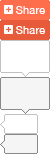
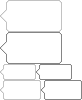
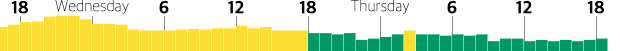
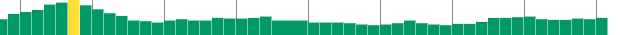
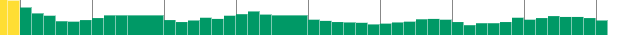
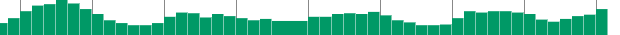
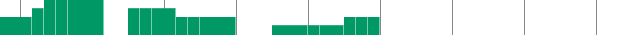
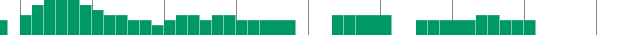
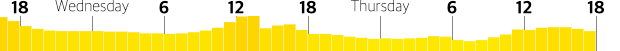
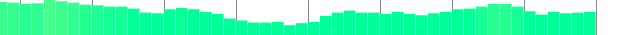
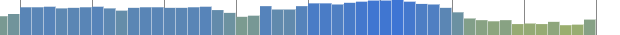
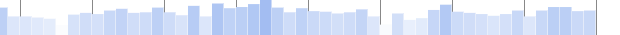
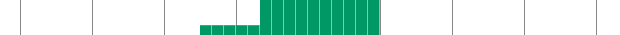
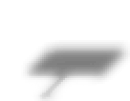
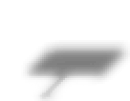
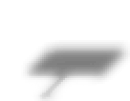
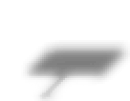
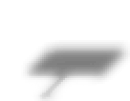
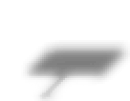
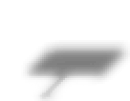
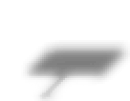
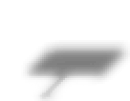
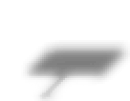
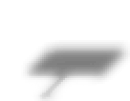
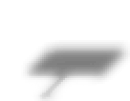
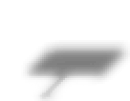
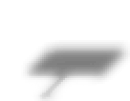
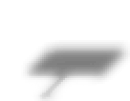
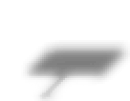
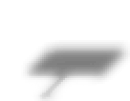
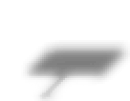
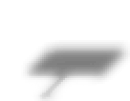
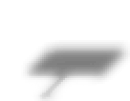
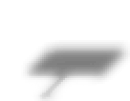
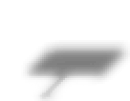
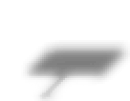
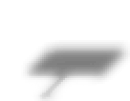
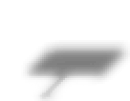
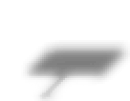
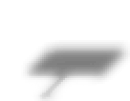
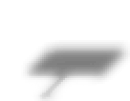
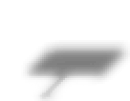
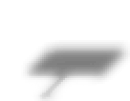
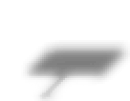
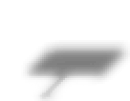
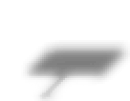
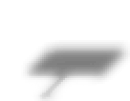
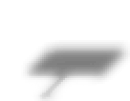
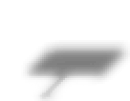
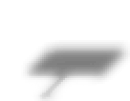
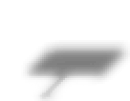
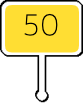
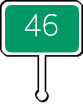
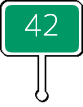
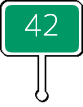
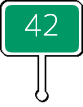
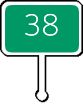
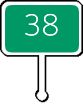
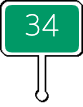
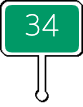
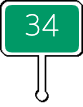
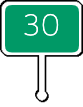
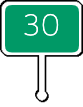
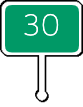
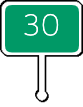
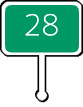
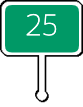
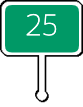
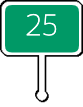
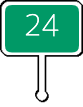
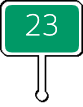
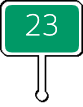
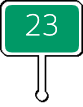
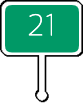
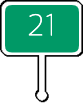
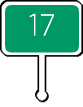
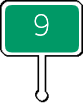
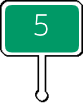
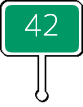
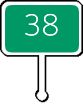
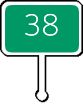
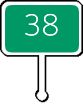
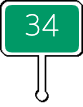
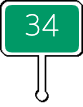
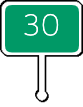
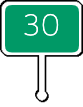
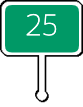
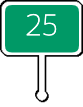
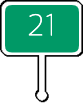
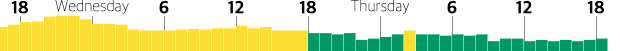
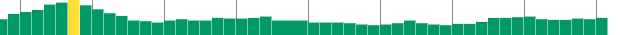
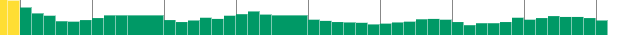
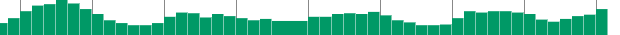
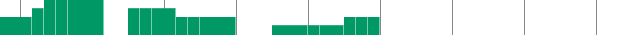
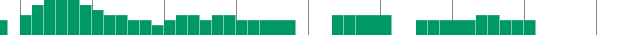
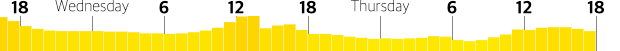
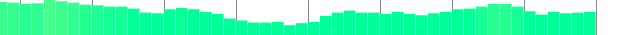
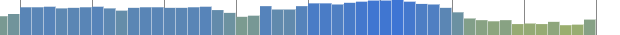
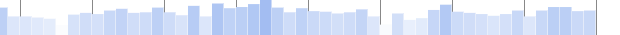
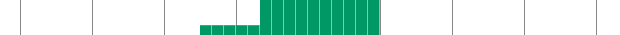

In [37]:
aqi_html = driver.page_source
print(aqi_html)

In [38]:
parsed_html = bs(aqi_html, 'lxml')

In [39]:
#9월의 공기질 데이터
pm_25 = parsed_html.find("tr", {"key":"202008"}).find("td",{"class","squares"})

In [40]:
#9월데이터 뽑기 성공..
pd.Series(pm_25.get_text(" ").split())

0     14
1     26
2     30
3     29
4     38
5     64
6     70
7     12
8     38
9     58
10    57
11    58
12    20
13    13
14    17
15     -
16     -
17     -
18     -
19     -
20     -
21     -
22     -
23     -
24     -
25     -
26     -
27     -
28     -
29     -
dtype: object

In [141]:
# 2020년의 데이터만 뽑아보자!

In [41]:
month = ["20200"+str(i) for i in range(9)] #2020년 월별로 데이터를 뽑기위한 리스트

pm_25 = parsed_html.find("tr", {"key":"202000"}).find("td",{"class","squares"})
# 시계열 자료이므로 인덱스에 날짜를 넣자!
df_2020 = pd.Series(pm_25.get_text(" ").split(), index = pd.date_range(start='01/01/2020', end='02/01/2020')[:-1])

for mo in month[1:]:
    pm_25 = parsed_html.find("tr", {"key":mo}).find("td",{"class","squares"})
    df_2020 = pd.concat([df_2020, pd.Series(pm_25.get_text(" ").split(), index = pd.date_range(start=str(int(mo[-1])+1)+'/01/2020', end=str(int(mo[-1])+2)+'/01/2020')[:-1])])
    

In [42]:
#2020년의 서울의 pm25 데이터를 뽑았다!
df_2020

2020-01-01      -
2020-01-02     71
2020-01-03    106
2020-01-04    127
2020-01-05    103
             ... 
2020-09-26      -
2020-09-27      -
2020-09-28      -
2020-09-29      -
2020-09-30      -
Freq: D, Length: 274, dtype: object

In [43]:
df_2020.value_counts()

-      16
78     11
57     11
58      8
62      8
       ..
30      1
134     1
92      1
128     1
10      1
Length: 103, dtype: int64

# 시각화

In [44]:
import matplotlib.pyplot as plt

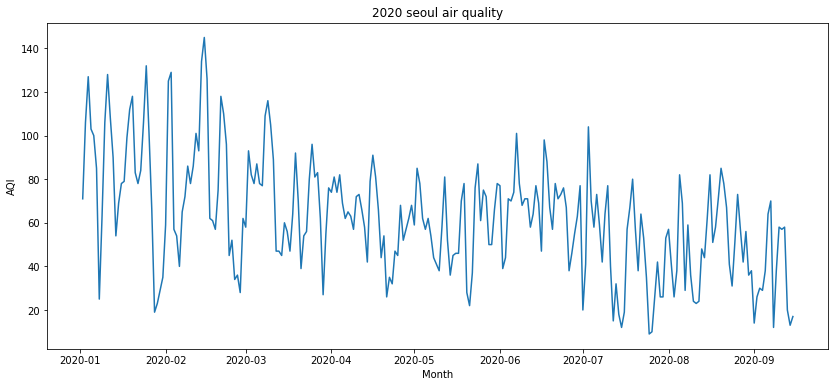

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6 #플롯의 크기 설정
df_2020[df_2020 == "-"] = np.nan # "-"가 있는 row에 nan 값 넣기
plt.plot(df_2020.astype(float))
plt.title("2020 seoul air quality")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.show()

# QUEST

aqi사이트:https://aqicn.org/city/korea/seoul/gwanak-gu/

위의 사이트에서 각자 좋아하는 관악구의 pm25와 pm10의 월별 aqi 시계열도를 그리고 최적의 sarima 모델을 찾아라!

trainset = 처음 데이터 ~ 최근 6개월 데이터

testset = 최근 6개월 데이터

hint:

- groupby를 쓰면 월별 지표를 구하기 쉽습니다.
- 결측치를 처리할 방법을 생각해 보세요!
- 예측값이 좋지 않다면 예측 설명을 해주실수 있으면 좋습니다! (ex 코로나..)